# Learn geopandas by plotting a United States shapefile

In this tutorial we will take a look at the powerful **geopandas** library and use it to plot a map of the United States.  This jupyter notebook is a companion notebook to my [GeoPandas Tutorial article](https://jcutrer.com/python/learn-geopandas-plotting-usmaps).

I have used other GIS related libraries in python and let me say **geopandas** is a real joy to use!

<hr>
<font color="green">
    <h4>A quick note before we start</h4>
    
I assume you know some basic python and how to install jupyter to run the companion notebook.  To start, clone my git repository with the following commands.
</font>
<hr>

```
git clone https://github.com/joncutrer/geopandas-tutorial.git
cd geopandas-tutorial
jupyter notebook
```

Here are the commands you will need to run if have not already installed geopandas.

In [1]:
# Prerequisites 
# conda install geopandas
# conda install -c conda-forge descartes

---

### Geo Data files

The data we will be working with comes from the US Census and is in a common shapefile format.  A shapefile actually consists of 3 separate files with the same file name.

* **filename.shp** - Shapefile shape format, contains the actual geometry data.
* **filename.dbf** - Shapefile attribute format, this file stores the attributes for each shape. it uses the dBase IV format.
* **filename.shx** - Shapefile index, this file makes working with larger shapefiles faster.  It contains no unique data, only an index of record offsets.

> The shapefile format is a geospatial vector data format for geographic information system (GIS) software. It is developed and regulated by Esri as a mostly open specification for data interoperability among Esri and other GIS software products. - [Wikipedia](https://en.wikipedia.org/wiki/Shapefile)

This next cell assumes that I am working in the terminal and am listing the data files in the data folder.

In [2]:
#ls -al data

---

### Reading shapefiles

Import the geopandas library and matplotlib for later use.

In [3]:
import matplotlib.pyplot as plt
import geopandas

Use the `geopandas.read_file()` function to read the shapefile from disk.  Geopandas will return a **GeoDataFrame** object which is similar to a pandas DataFrame.

**Note:** While it looks like the only file being read is the .shp file all of the other files were required to properly construct the GeoDataFrame. A bit different than the geojson file read in th GeoPandas notebook. Not sure at all what the relevant bits are in the other files. This tutorial works as 'advertised' once all of the files were in place.

In [11]:
states = geopandas.read_file('data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

Let's take a look at the data.

In [12]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


---

### Understanding Coordinate reference systems (CRS)

By default this shapefile contains very commons coordinates called WGS 84.  While WGS 84 is very common in GIS mapping, Mercator projection is the de facto standard for Web mapping applications.  If you want to learn more about coordinate systems, have a look at this excellent post [EPSG 4326 vs EPSG 3857](https://lyzidiamond.com/posts/4326-vs-3857) by Lyzi Diamond.

In [13]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

geopandas requires we know the geospatial reference system identifier so here is a list of common ones.

* **"EPSG:4326"** WGS84 Latitude/Longitude, used in GPS
* **"EPSG:3395"** Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
* **"EPSG:32633"** UTM Zones (North) - (Universal Transverse Mercator)
* **"EPSG:32733"** UTM Zones (South) - (Universal Transverse Mercator)

To make the map look a little more familiar lets reproject it's coordinates to **Mercator**.

In [14]:
states = states.to_crs("EPSG:3395")

## Plotting Shapefiles

Now lets plot our GeoDataFrame and see what we get.  Just like pandas, geopandas provides a `.plot()` method on GeoDataFrames.

<AxesSubplot:>

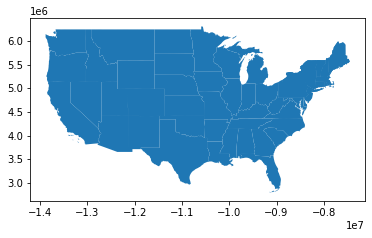

In [15]:
states.plot()

We can also plot the state polygons with no fill color by using `GeoDataFrame.boundary.plot()`.

<AxesSubplot:>

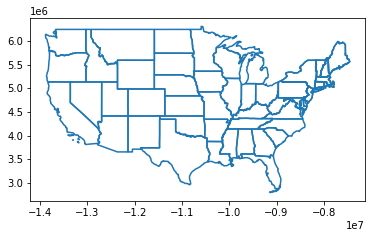

In [16]:
states.boundary.plot()

## Add some color to the map plot

Our map is bit small and only one solid color.  Lets enlarge it and add a colormap

Here are some cmap codes you can play around with.
```
viridis, plasma, inferno, magma, cividis
Greys, Purples, Blues, Greens, Oranges, Reds
YlOrBr, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn
PiYg, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, Spectral, coolwarm, bwr, seismic
twilight, twilight_shifted, hsv
Pastel1, Pastel2, PAired, Accent, Dark2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c
```
More info on colormaps can be found here https://matplotlib.org/tutorials/colors/colormaps.html

<AxesSubplot:>

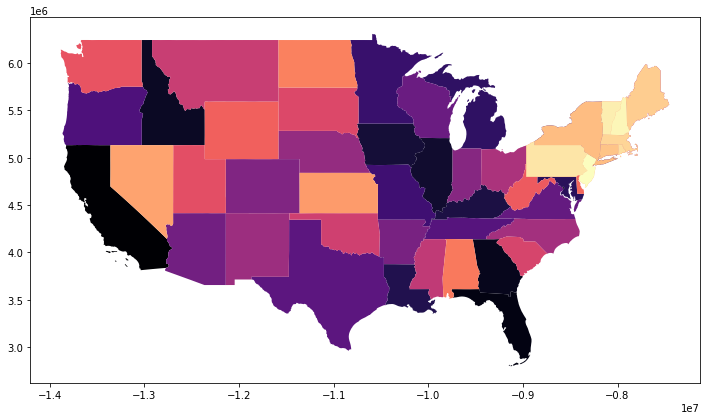

In [17]:
states.plot(cmap='magma', figsize=(12, 12))

Query the DataFrame for a specific state shape, I will plot Texas.

In [18]:
states[states['NAME'] == 'Texas']

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
16,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,Southwest,"POLYGON Z ((-11869267.604 3729445.479 0.000, -..."


<AxesSubplot:>

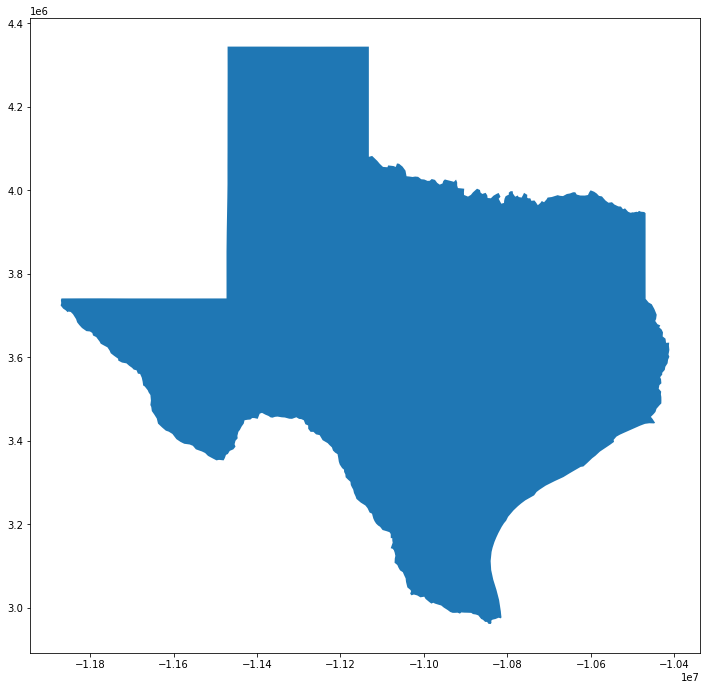

In [19]:
states[states['NAME'] == 'Texas'].plot(figsize=(12, 12))

---

### Plotting Multiple Shapes

Plot multiple states together, here are the states that makeup the South East region of the United States.

In [21]:
southeast = states[states['STUSPS'].isin(['FL','GA','AL','SC','NC', 'TN', 'AR', 'LA', 'MS'])]
southeast

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-10468824.609 3831551.686 0.000, -..."
15,47,01325873,0400000US47,47,TN,Tennessee,00,106800130794,2352882756,Southeast,"POLYGON Z ((-10052227.608 4143268.692 0.000, -..."
20,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -..."
26,37,01027616,0400000US37,37,NC,North Carolina,00,125917995955,13472722504,Southeast,"POLYGON Z ((-9382741.386 4167242.730 0.000, -9..."
30,28,01779790,0400000US28,28,MS,Mississippi,00,121531899917,3928587545,Southeast,"POLYGON Z ((-10199242.918 3645403.465 0.000, -..."
33,45,01779799,0400000US45,45,SC,South Carolina,00,77857913931,5074749305,Southeast,"POLYGON Z ((-9278840.010 4102724.263 0.000, -9..."
41,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9..."


<AxesSubplot:>

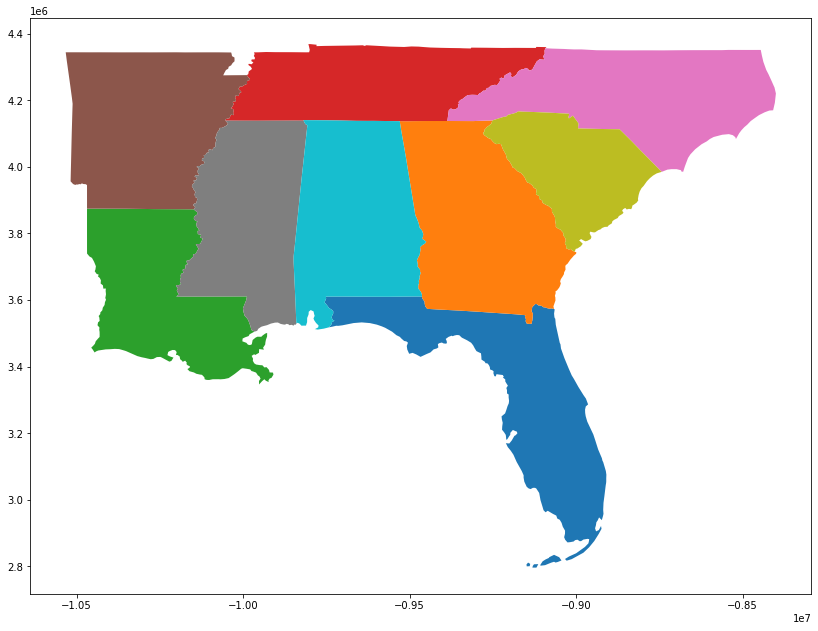

In [22]:
southeast.plot(cmap='tab10', figsize=(14, 12))

Instead of supplying a list of states you may have noticed there is `region` column.  Lets query by region and plot the West Region.

<AxesSubplot:>

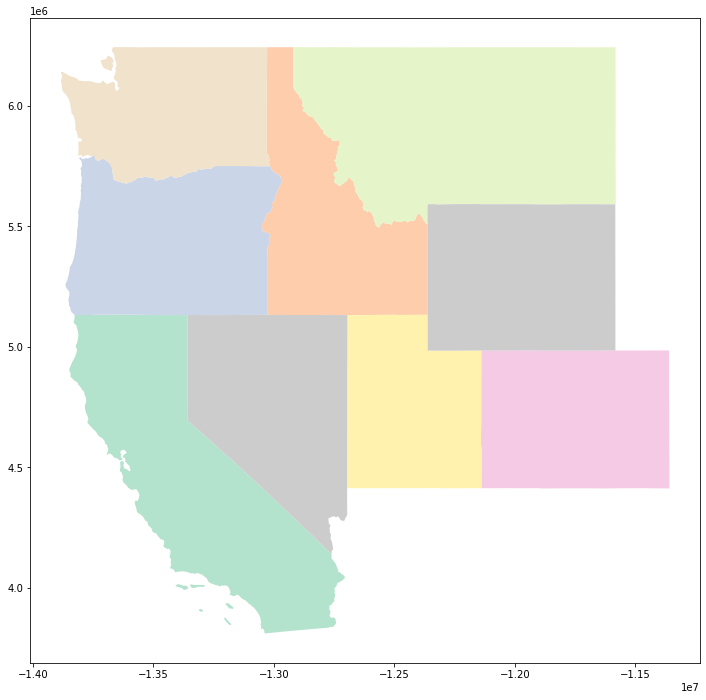

In [25]:
west = states[states['region'] == 'West']

west.plot(cmap='Pastel2', figsize=(12, 12))

### Add outlines and labels to each State

Here is another plot of the U.S NorthEast but this time we are going to use a lambda function to plot the state name over each state.  We also plotting the state shapes with a black outline.

As a bonus code snippet,  I have added a vertical watermark to the left side of the image.

**Note:** library update? The original annotate arguments were given as...
```python
west.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
```
This was the error message....
```python
/var/folders/34/slwjvrn907xgtxgz83tl0brr0000gn/T/ipykernel_15554/66420604.py in <lambda>(x)
      2 ax = fig.add_subplot()
      3 
----> 4 west.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
      5 
      6 # this plots the outlines of the states

TypeError: annotate() missing 1 required positional argument: 'text'
```

Looking in the [documentation for ax.annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) the first argument has been renamed 'text' instead of 's'. Changing the call to 
```python
west.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
```
... fixed the error. Sheesh!

Text(-0.05, 0.5, 'https://jcutrer.com')

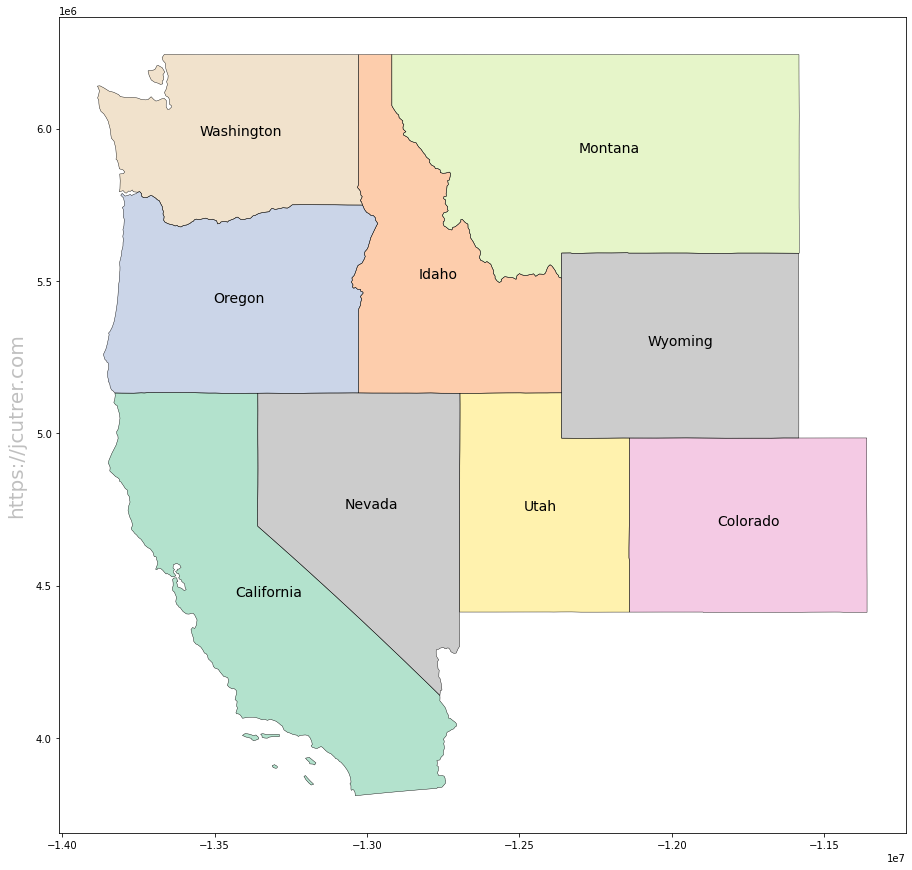

In [46]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

west.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);

# this plots the outlines of the states
west.boundary.plot(ax=ax, color='Black', linewidth=.4)

# this plots the body of the states
west.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

# this is the 'watermark'
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

### Multiline Labels

Building on the above example we can also use a newline (\n) character to create multiline labels.  This is useful if you want to display some other data column from the GeoDataFrame.  Here I am plotting the state name as well as the land area of the state in square miles.

<AxesSubplot:>

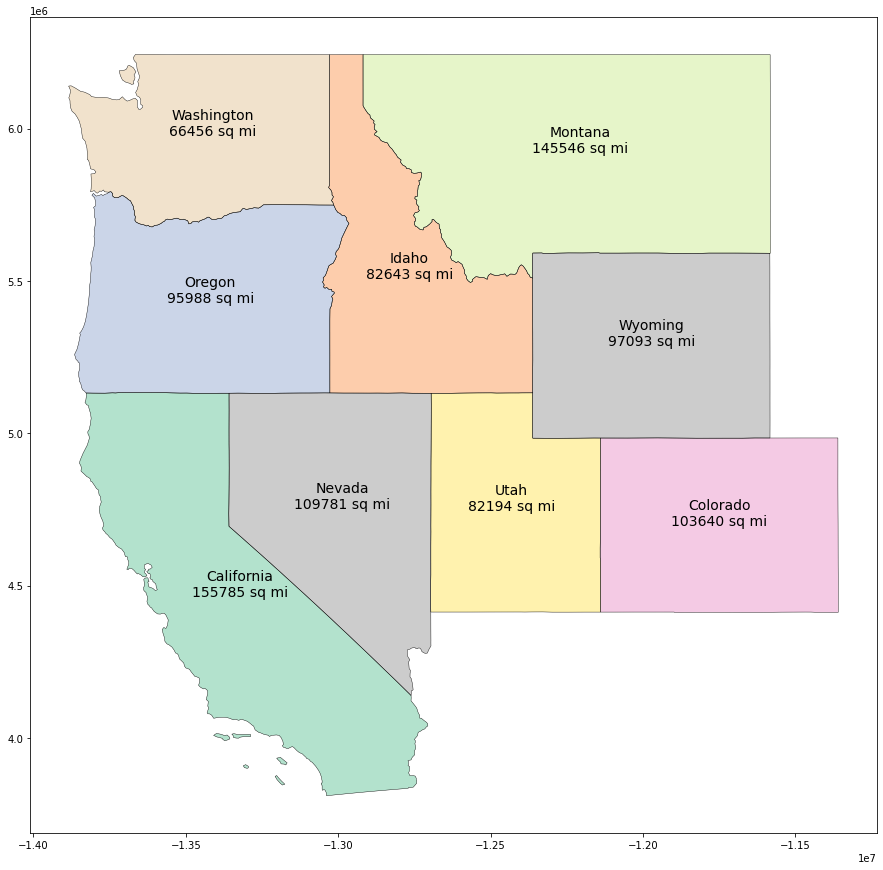

In [47]:
import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

west.apply(lambda x: ax.annotate(
    text=x.NAME + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);

west.boundary.plot(ax=ax, color='Black', linewidth=.4)

west.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

### Multiline Labels using a longitudinal offset

If we want to change the font size of our second data row or place the label somewhere other than directly below we will need to use a lat,long offset to draw a second label in another call to `annotate()`

To understand how we do this, lets first look at the data in `x.geometry.centroid.coords[0]`

The `annotate()` method requires we provide a tuple for attribute `xy`. In the previous apply lambda function we are passing `x.geometry.centroid.coords[0]`.  

In [51]:
# Get the first state
tmpdf = states.iloc[0]
# Which state
print(tmpdf.NAME)
# Get the centroid coordinates
tmpdf.geometry.centroid.coords[0]

California


(-13322855.65488882, 4465905.292663824)

### format of states.iloc

Here is the data format for the .iloc portion of the data frame.

In [55]:
trial = states.iloc
print(trial[0:12])

   STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       06  01779778  0400000US06    06     CA            California   00   
1       11  01702382  0400000US11    11     DC  District of Columbia   00   
2       12  00294478  0400000US12    12     FL               Florida   00   
3       13  01705317  0400000US13    13     GA               Georgia   00   
4       16  01779783  0400000US16    16     ID                 Idaho   00   
5       17  01779784  0400000US17    17     IL              Illinois   00   
6       19  01779785  0400000US19    19     IA                  Iowa   00   
7       21  01779786  0400000US21    21     KY              Kentucky   00   
8       22  01629543  0400000US22    22     LA             Louisiana   00   
9       24  01714934  0400000US24    24     MD              Maryland   00   
10      26  01779789  0400000US26    26     MI              Michigan   00   
11      27  00662849  0400000US27    27     MN             Minnesota   00   

This is the xy coordinates of the first state.  This is where our label is plotted. We can pass an offset to `xy` like this.

In [56]:
( tmpdf.geometry.centroid.coords[0][0], tmpdf.geometry.centroid.coords[0][1] - 55000 )

(-13322855.65488882, 4410905.292663824)

Here is the complete example where we print 3 labels.  State name, land area, and FIPS code.  I will also use a different font size and color for the second two labels.

<AxesSubplot:>

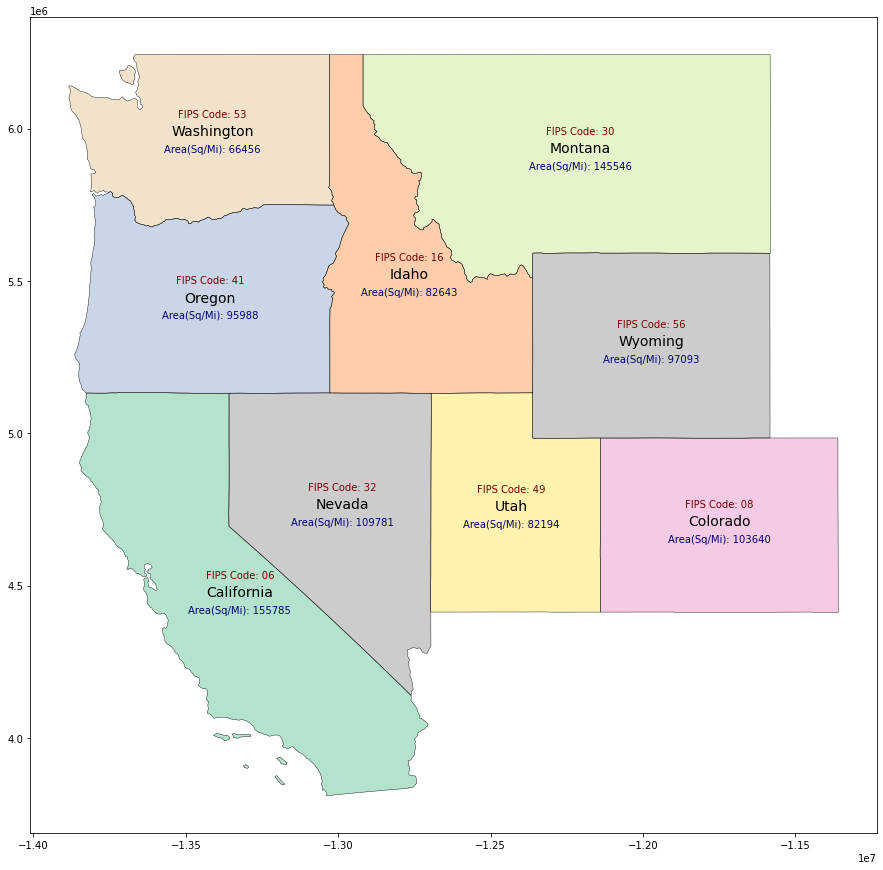

In [59]:
import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

# Label 1 State Name
west.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);

# Label 2 Area using longitudinal offset
west.apply(
    lambda x: ax.annotate(
        text="Area(Sq/Mi): " + str(math.floor(x.ALAND / 2589988.1103)), 
        xy= (x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 55000 ),
        ha='center', 
        color='#000077', # blue
        fontsize=10),axis=1);

# Label 3 FIPS Code using longitudinal Offset 
west.apply(
    lambda x: ax.annotate(
        text="FIPS Code: " + x.STATEFP, 
        xy= (x.geometry.centroid.coords[0][0] , x.geometry.centroid.coords[0][1] + 60000 ),
        ha='center',
        color='#770000', #red
        fontsize=10),axis=1);


west.boundary.plot(ax=ax, color='Black', linewidth=.4)

west.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

### Combining Overlay Maps

Here is an example where we create a larger boundary map and then overlay in a second map.  It's important to note that figsize must be specified in the first plot.

<AxesSubplot:>

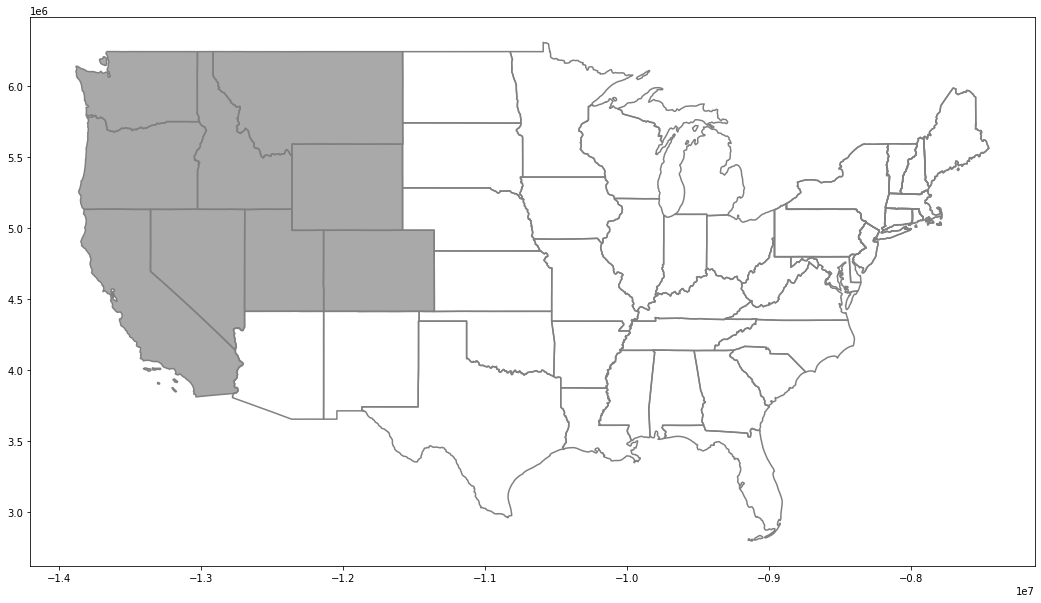

In [60]:
us_boundary_map = states.boundary.plot(figsize=(18, 12), color="Gray")
west.plot(ax=us_boundary_map,  color="DarkGray")

We can continue to chain our plots together to a plot of all othe United States Regions.

The first plot `us_boundary_map` serves as our base map.

Then we reference it with `ax=us_boundary_map` when we call `plot()` on each of our region GeoDataFrame.

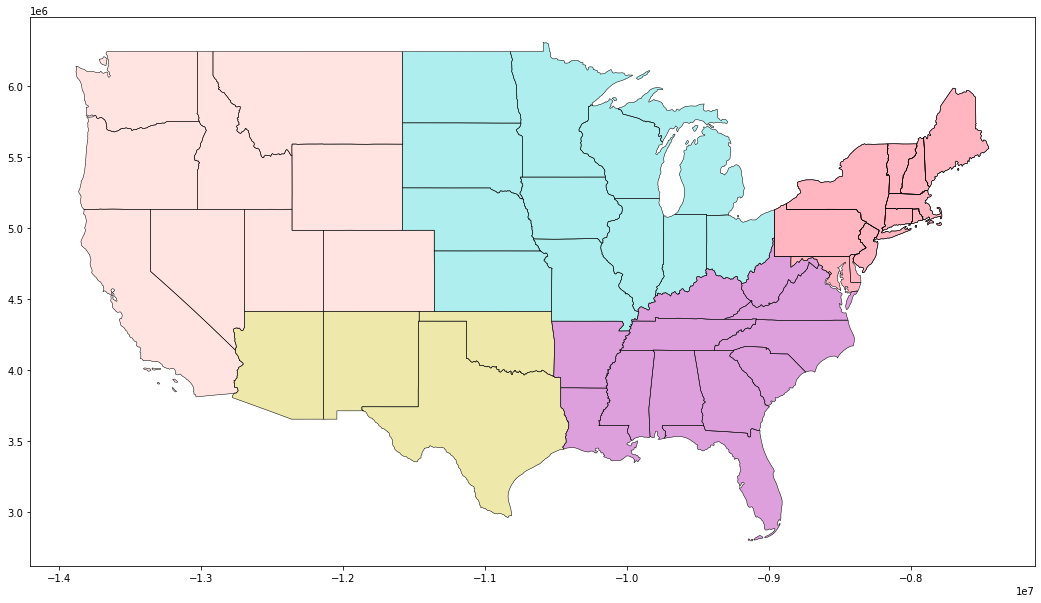

In [61]:
west = states[states['region'] == 'West']
southwest = states[states['region'] == 'Southwest']
southeast = states[states['region'] == 'Southeast']
midwest = states[states['region'] == 'Midwest']
northeast = states[states['region'] == 'Northeast']

us_boundary_map = states.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)

west.plot(ax=us_boundary_map,  color="MistyRose")

southwest.plot(ax=us_boundary_map, color="PaleGoldenRod")

southeast.plot(ax=us_boundary_map, color="Plum")

midwest.plot(ax=us_boundary_map, color="PaleTurquoise")

final_map = northeast.plot(ax=us_boundary_map, color="LightPink")


---

#### Tuning map attributes based on plot size

If you intend to plot a small map the default linewidth of 1 is probably too large.  You can use decimal numbers to plot smaller lines.

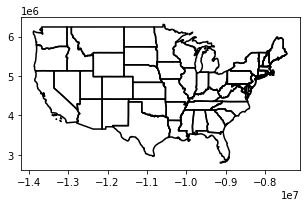

In [62]:
tiny_map = states.boundary.plot(figsize=(5, 5),  color="Black")

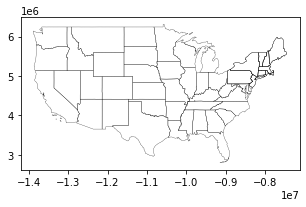

In [63]:
tiny_map = states.boundary.plot(figsize=(5, 5),  color="Black", linewidth=.25)

If you intend to generate a large map you should consider increasing the `linewidth`.

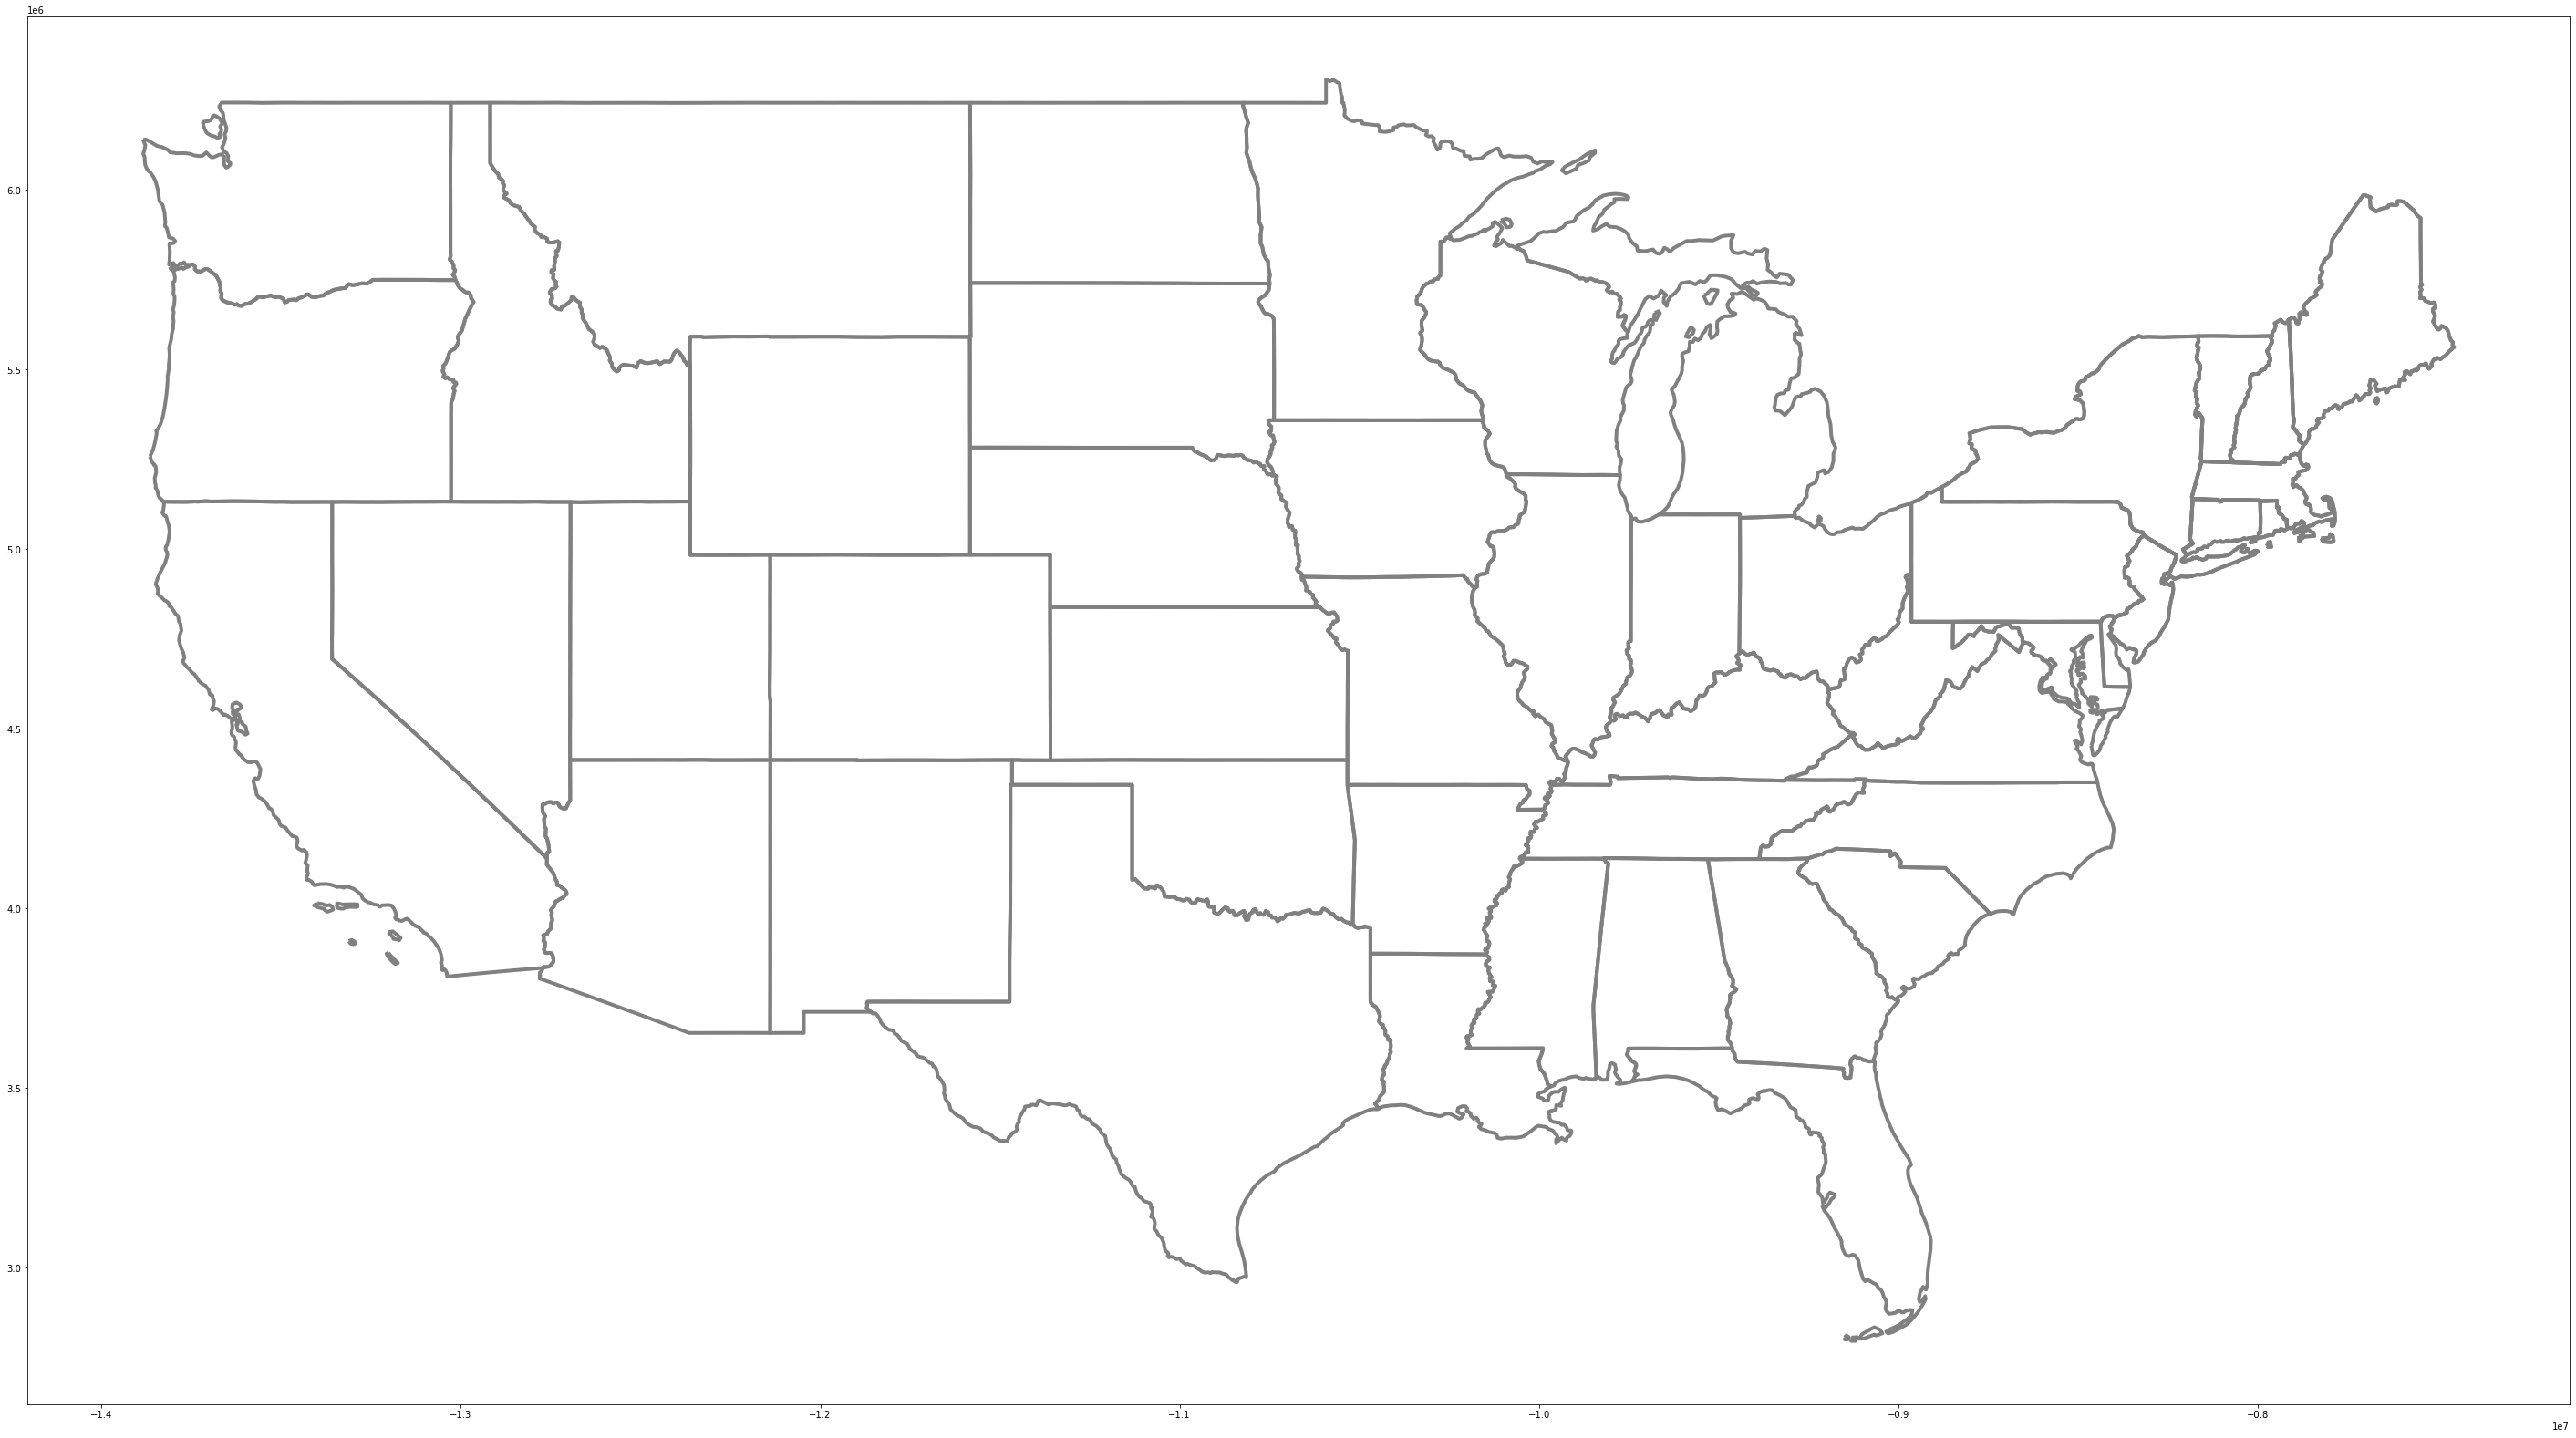

In [65]:
hires_map = states.boundary.plot(figsize=(50, 28),  color="Gray", linewidth=4)

(-14205996.319552857, -7131248.786754098, 2620945.8783998108, 6483447.28674047)

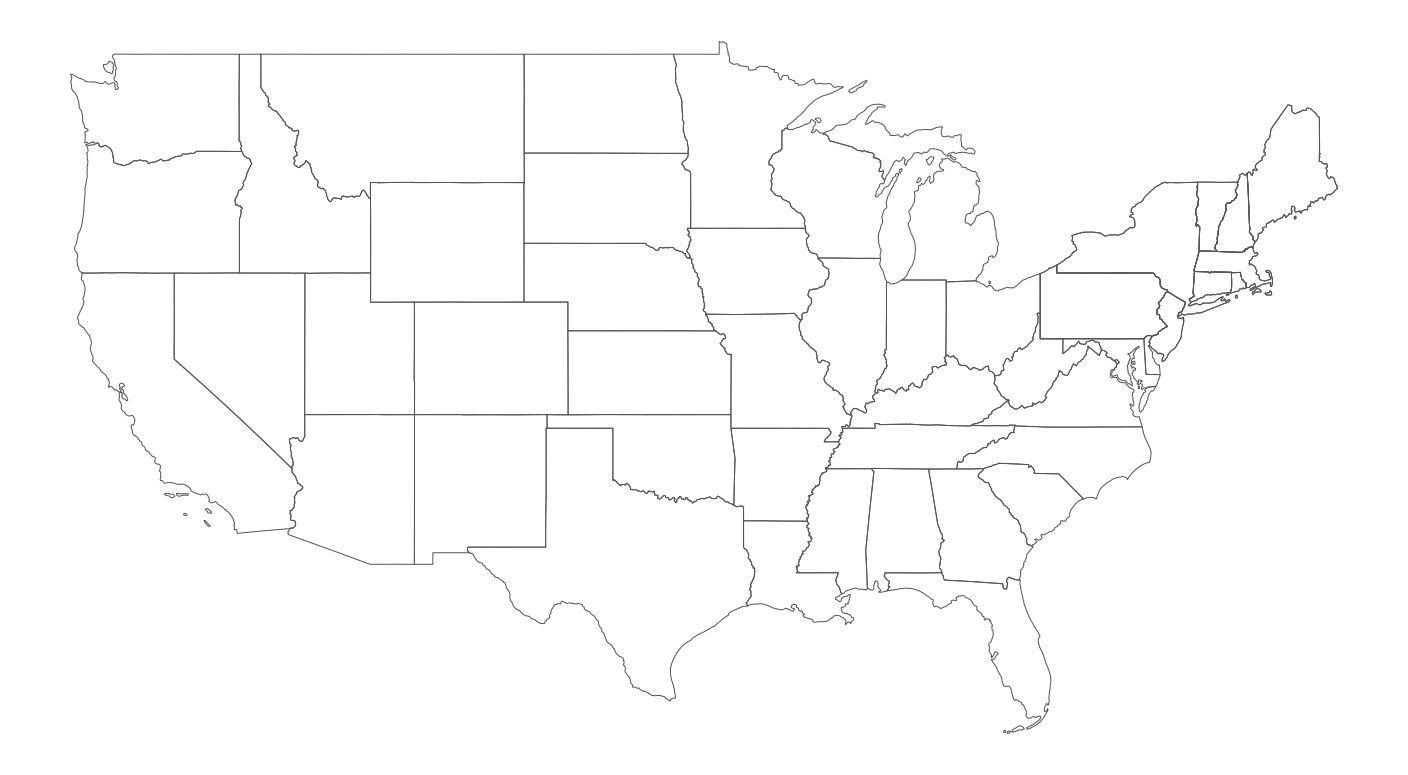

In [67]:
us_map = states.boundary.plot(figsize=(25, 14),  color="#555555", linewidth=1)
us_map.axis('off')


---

### Saving the map plot to disk

What if we want to save our map? we need to get the figure, trim whitespace and call `savefig()`

In [68]:
fig = us_map.get_figure()
fig.tight_layout()
fig.savefig('usa.png', dpi=96)

In [69]:
ls -al usa.png

-rw-r--r--  1 bruceemerson  staff  173596 Dec 16 09:43 usa.png


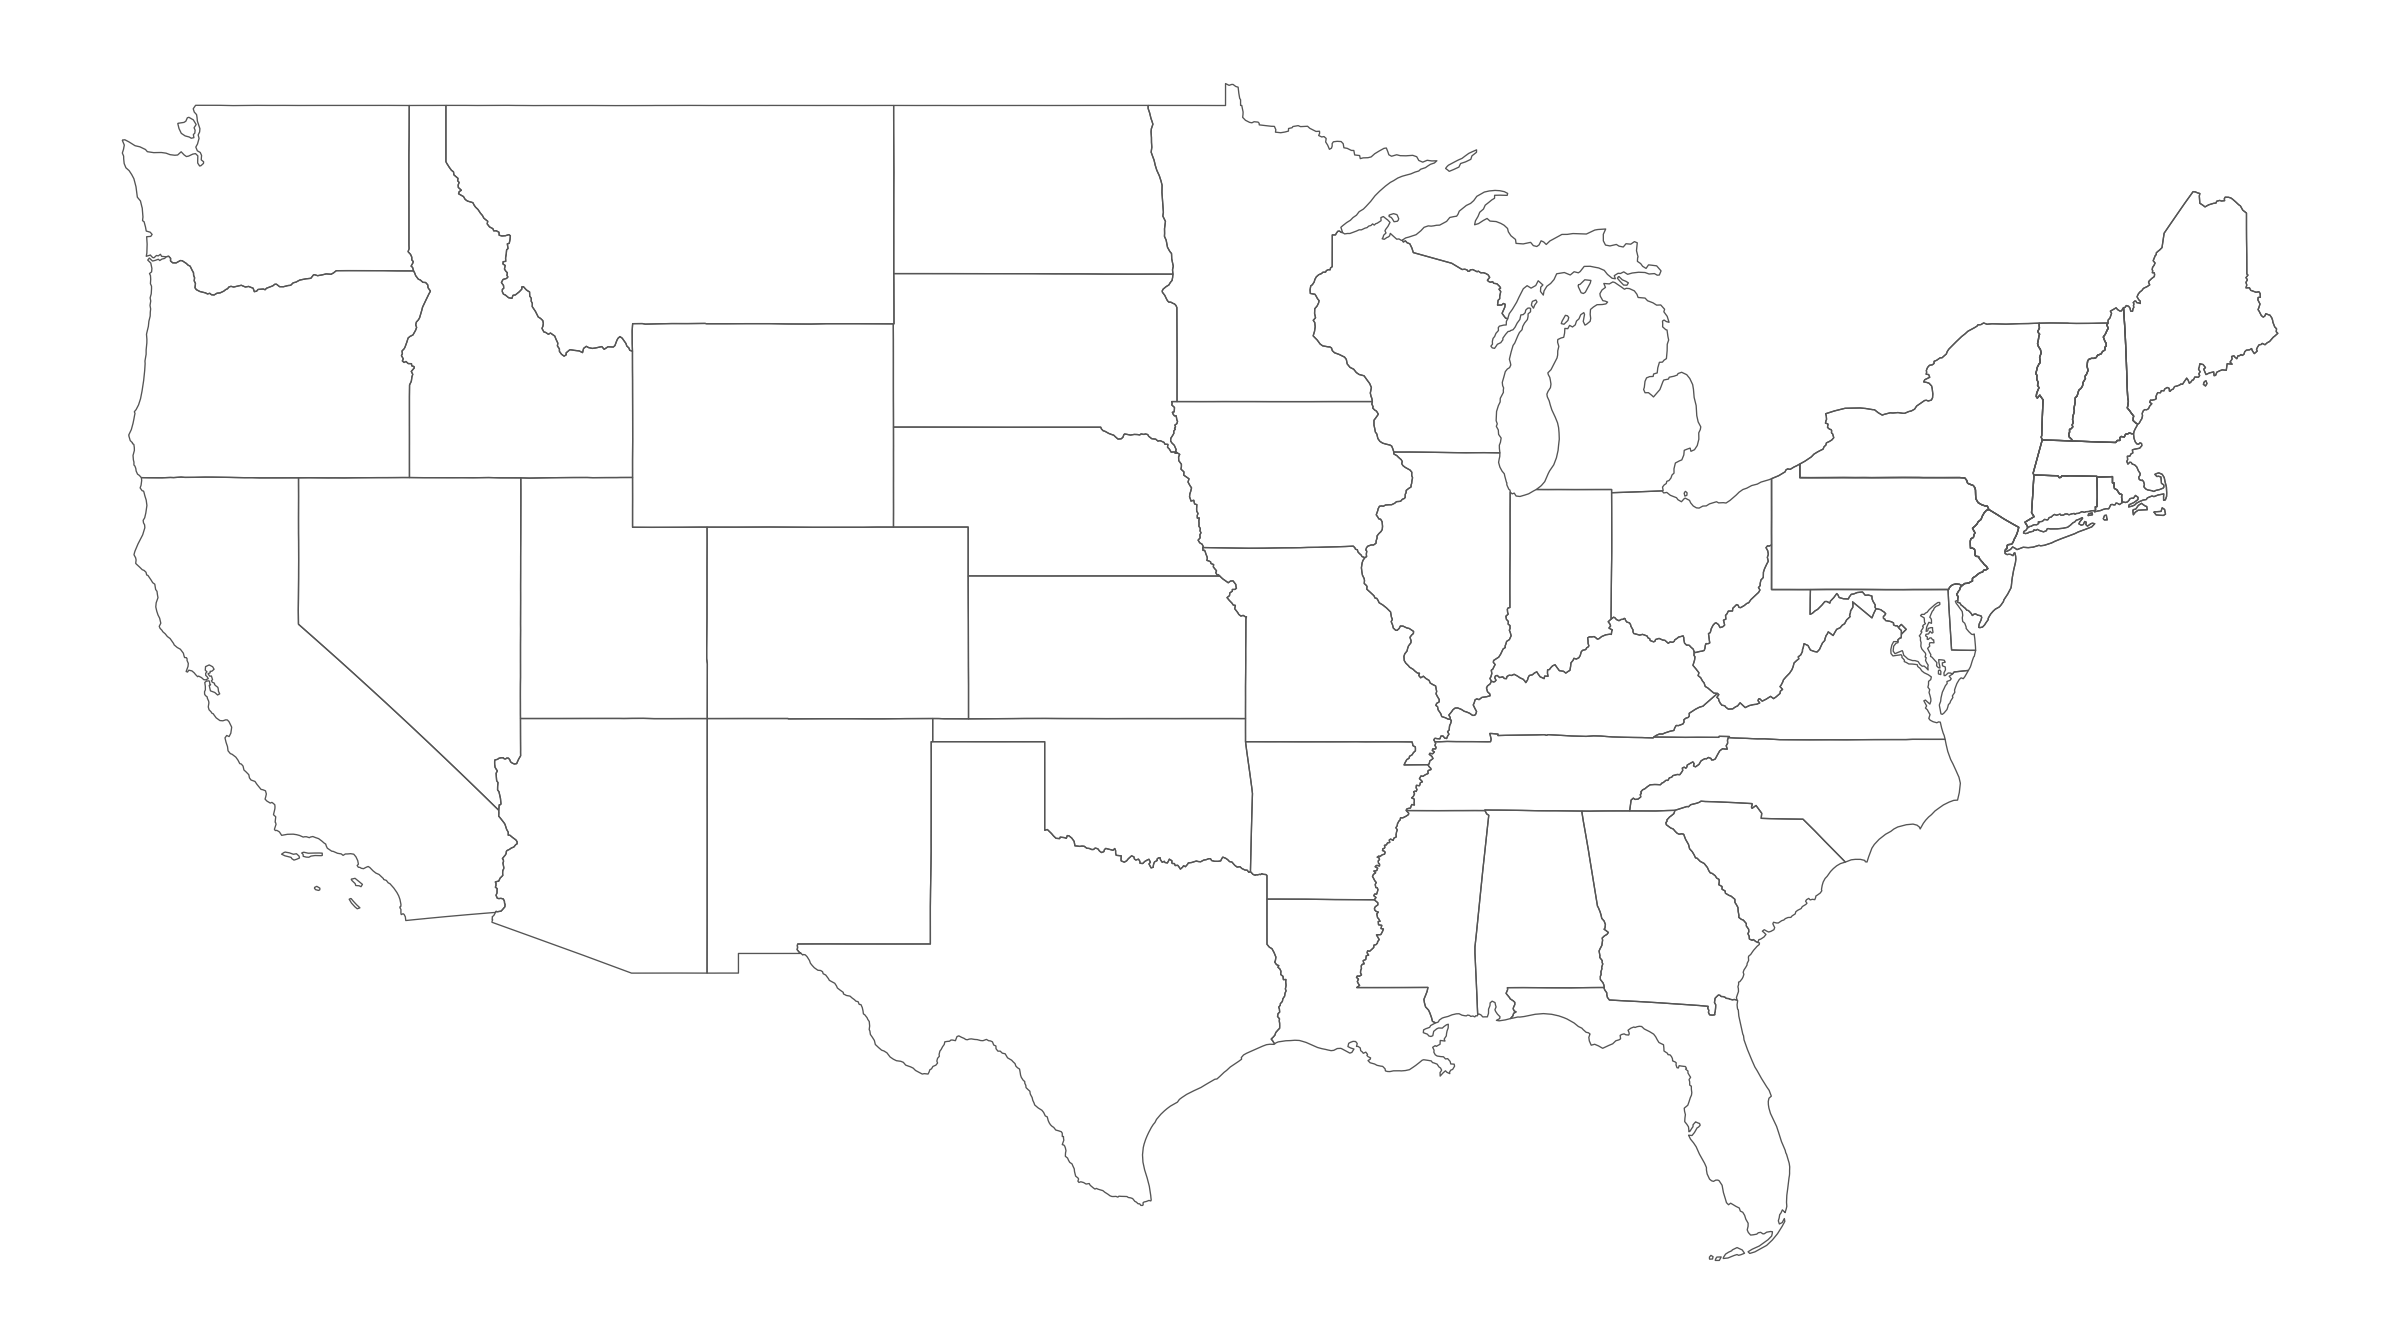

In [70]:
from IPython.display import Image
Image(filename='usa.png') 

Congratulations, you are well on your way to becoming a GIS expert with `geopandas`.  I hope this tutorial has helped you learn a little more about GeoPandas.